## Importieren der benötigten Bibliotheken

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

## Bearbeiten der Datensätze 

Einlesen der CSV-Dateien

In [77]:
dax_data = pd.read_csv("C:\\Users\\Simon\\Desktop\\Dax.csv")
sp500_data = pd.read_csv("C:\\Users\\Simon\\Desktop\\S&P500.csv")

Date-Spalte als Index setzen (vorher werden die Daten erst in Datetime-Objekte umgewandelt)

In [78]:
dax_data["Date"] = pd.to_datetime(dax_data["Date"])
dax_data = dax_data.set_index("Date")
sp500_data["Date"] = pd.to_datetime(sp500_data["Date"])
sp500_data = sp500_data.set_index("Date")

Entfernen von unbekannten Werten

In [79]:
dax_data = dax_data.dropna()
sp500_data = sp500_data.dropna()

Beide Datensätze auf gleiche Größe reduzieren (nur Tage, zu denen beide Daten haben)

In [80]:
idx = dax_data.index.intersection(sp500_data.index)
dax_data = dax_data.loc[idx]
sp500_data = sp500_data.loc[idx]

Entfernen der Adj Close Spalten

In [81]:
dax_data = dax_data.drop(["Adj Close"], axis=1)
sp500_data = sp500_data.drop(["Adj Close"], axis=1)

In [82]:
dax_data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-19,10777.419922,10831.440430,10749.549805,10766.209961,96506200.0
2018-12-20,10621.179688,10686.370117,10563.440430,10611.099609,122450600.0
2018-12-21,10573.080078,10654.660156,10512.639648,10633.820313,216162200.0
2018-12-27,10607.419922,10635.450195,10279.200195,10381.509766,104152600.0
2018-12-28,10452.019531,10586.799805,10431.379883,10558.959961,52604300.0


In [83]:
sp500_data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-19,2547.050049,2585.290039,2488.959961,2506.959961,5127940000
2018-12-20,2496.770020,2509.629883,2441.179932,2467.419922,5585780000
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,7609010000
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,4096610000
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,3702620000


Nun beinhalten beide Datensätze lediglich 489 Zeilen mit 5 Spalten und alle Daten(Tage) zu denen einer der beiden Indizes keine Werte besitzt, wurden entfernt.
Somit sind beide Datensätze gleich groß und von gleicher Struktur und können problemlos verglichen werden

## Datenanalyse

Plotten der Dax-/S&P500-Kurve anhand der Abschluss-Kurse

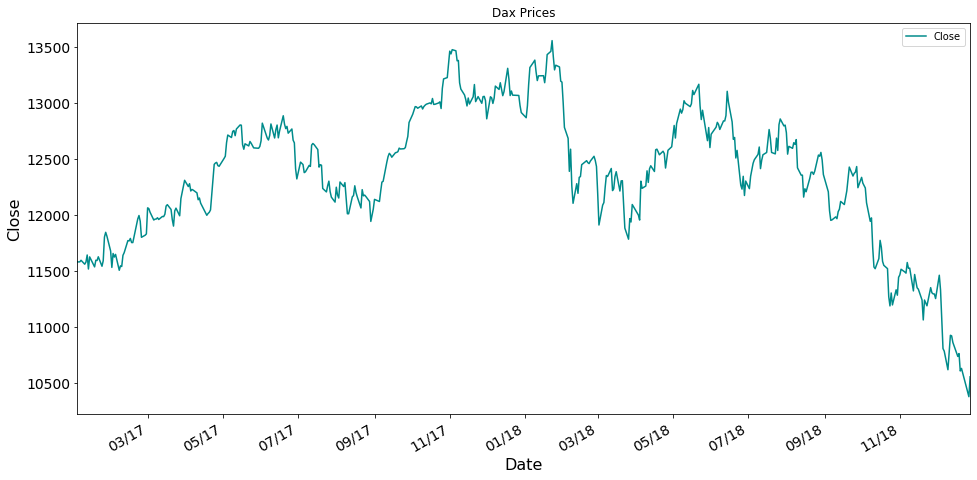

In [84]:
ax = dax_data["Close"].plot(figsize = (16,8), title = "Dax Prices", color = "darkcyan")
#Setzen der x-Achsen-ticks im Intervall von 2 Monaten im Format Monat/Jahr
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
#Anpassen der Labels und Schriftgrößen
plt.ylabel("Close", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend();

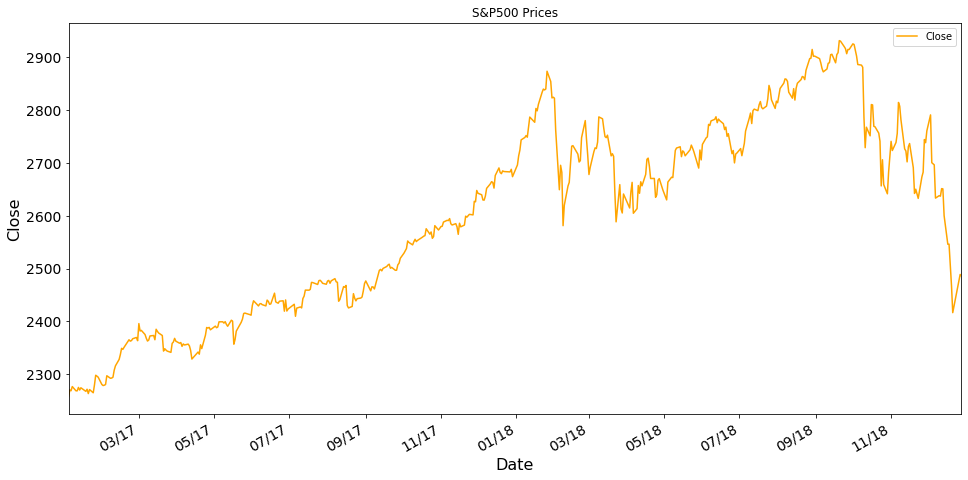

In [85]:
ax = sp500_data["Close"].plot(figsize = (16,8), title = "S&P500 Prices", color = "orange")
#Setzen der x-Achsen-ticks im Intervall von 2 Monaten im Format Monat/Jahr
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
#Anpassen der Labels und Schriftgrößen
plt.ylabel("Close", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend();

Man kann beobachten, dass beide Indizes zu Beginn und Ende des Jahres 2018 einen größeren Rückgang zu verbuchen hatten.

### Plotten von Candlestick-Charts für die beiden Indizes

##### Dax Plot

In [86]:
dax_data = dax_data.reset_index()
fig = go.Figure(data=[go.Candlestick(x=dax_data["Date"],
                open=dax_data["Open"], high=dax_data["High"],
                low=dax_data["Low"], close=dax_data["Close"])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()
dax_data["Date"] = pd.to_datetime(dax_data["Date"])
dax_data = dax_data.set_index("Date")

###### S&P500

In [87]:
sp500_data = sp500_data.reset_index()
fig = go.Figure(data=[go.Candlestick(x = sp500_data["Date"],open=sp500_data["Open"], high=sp500_data["High"],
                low=sp500_data["Low"], close=sp500_data["Close"])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()
sp500_data["Date"] = pd.to_datetime(sp500_data["Date"])
sp500_data = sp500_data.set_index("Date")

Auch hier sieht man erneut zu Beginn, bzw. am Ende des Jahres 2018 einen großen Kurssturz. Während dies beim Dax zu Beginn 2018 ein Kurssturz ohne wirkliche Korrektur ist, werden beim S&P500 auch in diesem Zeitraum teils noch positive Renditen eingefahren. Ende 2018 werden wieder große Kursverluste verbucht, jedoch werden diese beim Dax durch Tagesgewinne abgeschwächt.Beim S&P500 hingegen werden kurz vor Weihnachten (wahrscheinlich auch dem Volumen geschuldet) starke Kursverluste ohne nennenswerte Korrektur eingefahren.

Plotten des täglich gehandelten Volumens

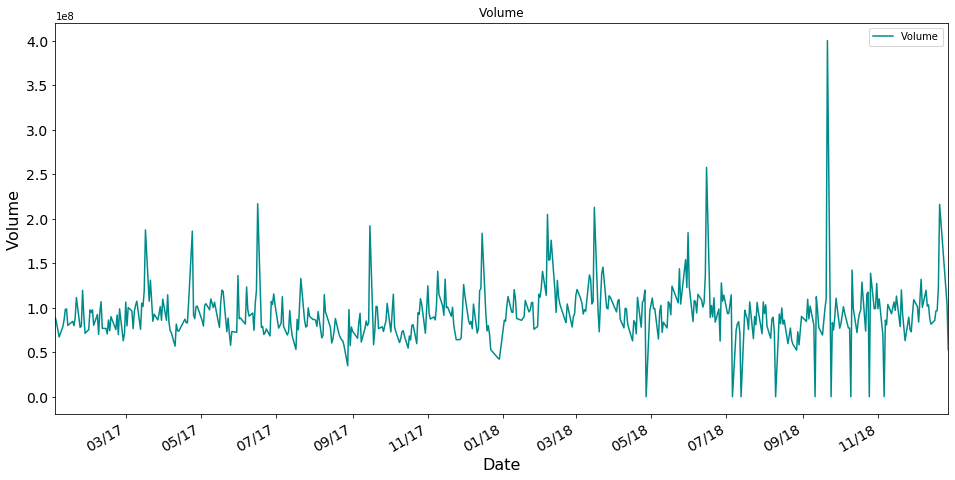

In [88]:
ax = dax_data["Volume"].plot(figsize = (16,8), title = "Volume", color = "darkcyan")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
plt.ylabel("Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend();

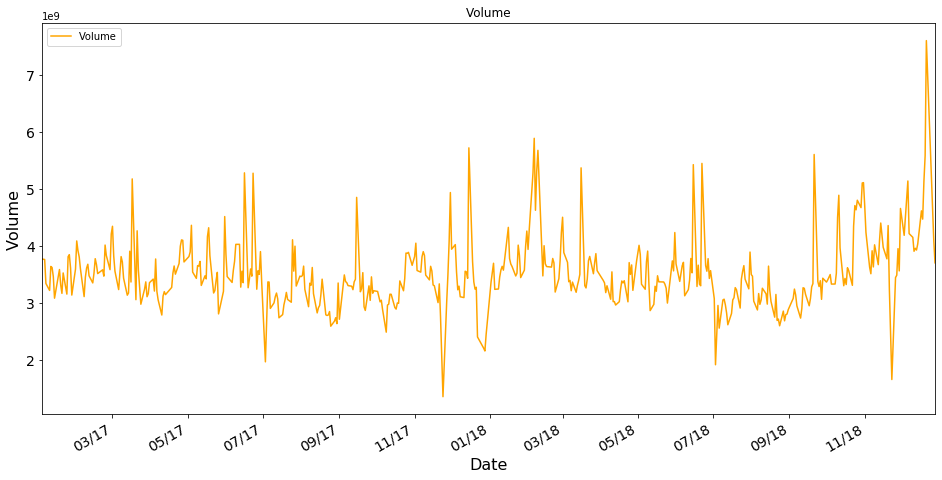

In [89]:
ax = sp500_data["Volume"].plot(figsize=(16,8), title = "Volume", color = "orange")
#Einstellen der x-Axis-Ticks 
#Tick-Intervalle auf zwei Monate setzen
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#Datum formatieren zu m/y
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
#Beschriftung der Axen und Größe der Beschriftung
plt.ylabel("Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
#Schriftgröße der Axen-Ticks
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend();

Es ist interessant zu beobachten, dass dort, wo größere Kursverluste zu bemerken sind (Anfang und Ende 2018) nicht, wie zuerst vermutet, deutlich weniger Volumen gehandelt wird, sondern sogar deutlich mehr als gewöhnlich.
Dementsprechend ist das geringe Volumen nicht mehr, bzw. noch nicht auf die Weihnachts-Feiertage zurückzuführen.
Es kann also vermutet werden, dass diese Kursverluste aufgrund von Ängsten der Anleger entstanden sind.

## Betrachten einiger Kennzahlen der Indizes

In [90]:
dax_data.describe()

,Open,High,Low,Close,Volume
count,489.000000,489.000000,489.000000,489.000000,4.890000e+02
mean,12363.767640,12421.296593,12295.603871,12357.004394,9.304751e+07
std,588.602976,585.042358,594.660202,592.145297,3.157069e+07
min,10452.019531,10586.799805,10279.200195,10381.509766,0.000000e+00
25%,12026.450195,12081.400391,11966.019531,12027.320313,7.716800e+07
50%,12418.259766,12478.280273,12348.910156,12417.129883,9.039240e+07
75%,12767.129883,12819.599609,12714.030273,12774.259766,1.049007e+08
max,13577.139648,13596.889648,13517.809570,13559.599609,4.001654e+08


In [91]:
sp500_data.describe()

,Open,High,Low,Close,Volume
count,489.000000,489.000000,489.000000,489.000000,4.890000e+02
mean,2599.370874,2609.662964,2587.461059,2598.841106,3.520116e+09
std,182.998038,185.204683,180.572780,182.396534,6.161420e+08
min,2251.570068,2263.879883,2245.129883,2257.830078,1.349780e+09
25%,2434.649902,2442.229980,2428.120117,2434.500000,3.182780e+09
50%,2629.679932,2650.620117,2605.439941,2632.560059,3.428340e+09
75%,2742.939941,2756.820068,2727.919922,2744.280029,3.736890e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,7.609010e+09


## Berechnen der insgesamt umgesetzten Geldmengen

In [92]:
dax_data["Total Traded"] = dax_data["Close"]*dax_data["Volume"]

In [93]:
sp500_data["Total Traded"] = sp500_data["Close"]*sp500_data["Volume"]

## Berechnen der gleitenden Durchschnitte 

###### Dax-Plot

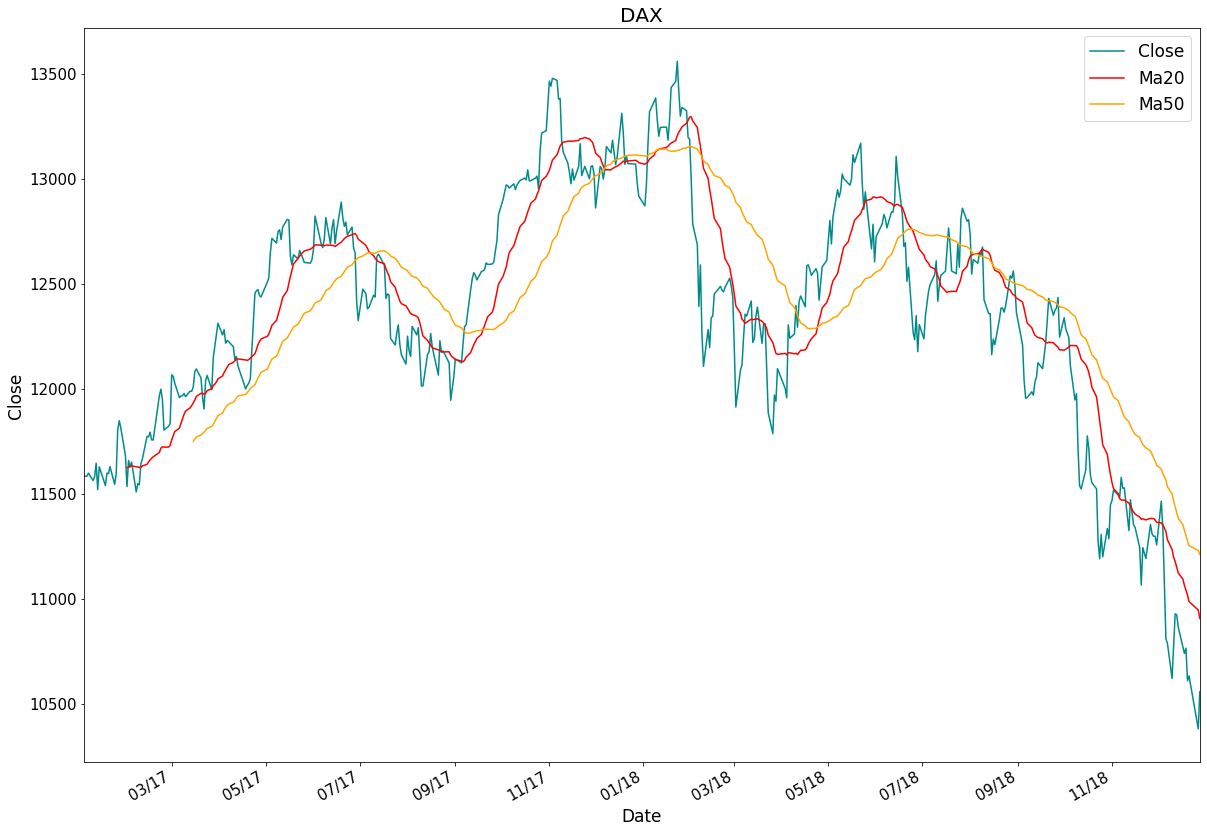

In [94]:
#gleitender Durchschnitt über 20 Tage
dax_data["Ma20"] = dax_data["Close"].rolling(20).mean()
#gleitender Durchschnitt über 50 Tage
dax_data["Ma50"] = dax_data["Close"].rolling(50).mean()
#Plotten der Dax-Kurve mit den gleitenden Durchschnitten

ax = dax_data[["Close", "Ma20", "Ma50"]].plot(label="Dax",figsize =(20,15), color = ["darkcyan", "red", "orange"])
ax.set_title("DAX", fontsize=20)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
plt.ylabel("Close", fontsize = 17)
plt.xlabel("Date", fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={"size":17});


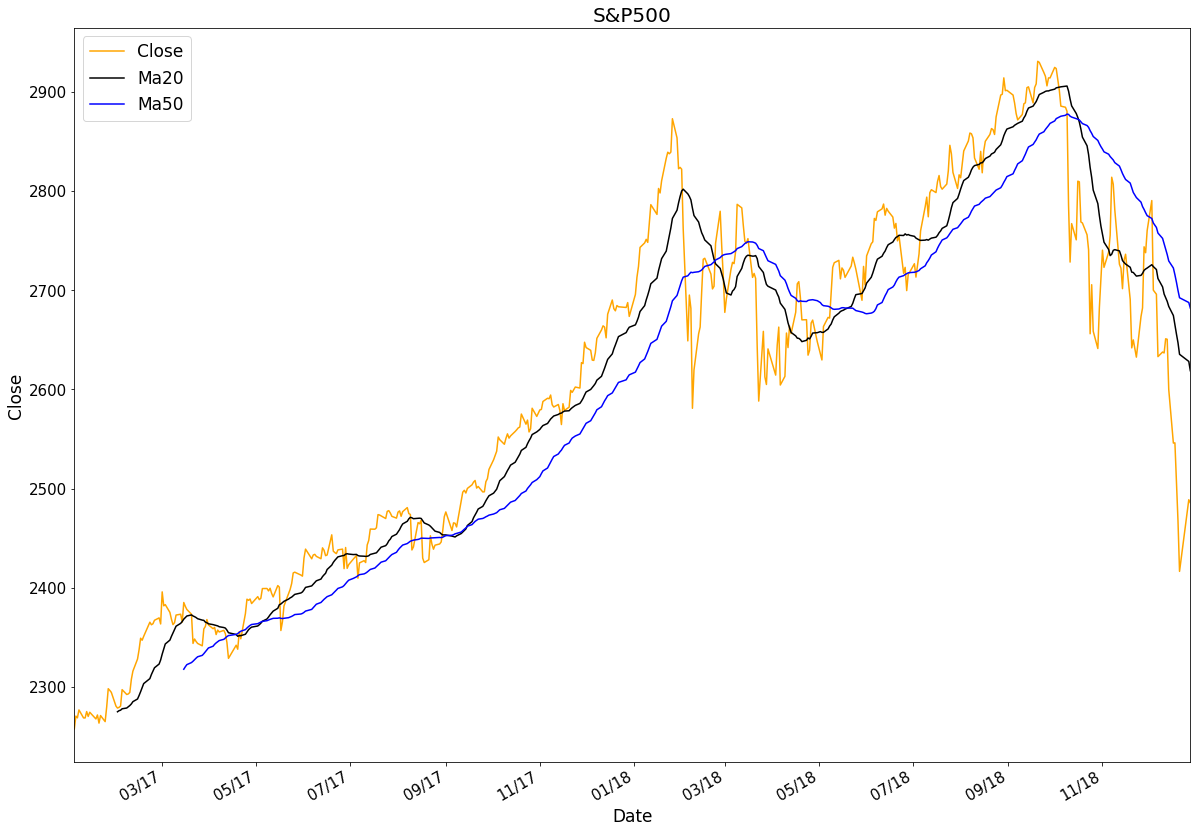

In [95]:
#gleitender Durchschnitt über 20 Tage
sp500_data["Ma20"] = sp500_data["Close"].rolling(20).mean()
#gleitender Durchschnitt über 50 Tage
sp500_data["Ma50"] = sp500_data["Close"].rolling(50).mean()
#Plotten des S&P500 und der gleitenden Durchschnitte
ax = sp500_data[["Close", "Ma20", "Ma50"]].plot(label="S&P500", figsize =(20,15), color = ["orange", "black", "blue"])
ax.set_title("S&P500", fontsize = 20)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
plt.ylabel("Close", fontsize = 17)
plt.xlabel("Date", fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={"size": 17});

## Berechnung der täglichen Renditen

In [96]:
dax_data["Daily Return"] = dax_data["Close"].pct_change()

In [97]:
sp500_data["Daily Return"] = sp500_data["Close"].pct_change()

In [98]:
dax_data.tail()

,Open,High,Low,Close,Volume,Total Traded,Ma20,Ma50,Daily Return
Date,,,,,,,,,
2018-12-19,10777.419922,10831.440430,10749.549805,10766.209961,96506200.0,1.039006e+12,11041.154053,11302.898418,0.002357
2018-12-20,10621.179688,10686.370117,10563.440430,10611.099609,122450600.0,1.299336e+12,11018.388526,11275.576016,-0.014407
2018-12-21,10573.080078,10654.660156,10512.639648,10633.820313,216162200.0,2.298630e+12,10987.871045,11254.002422,0.002141
2018-12-27,10607.419922,10635.450195,10279.200195,10381.509766,104152600.0,1.081261e+12,10947.312012,11230.845625,-0.023727
2018-12-28,10452.019531,10586.799805,10431.379883,10558.959961,52604300.0,5.554467e+11,10907.524024,11211.548633,0.017093


In [99]:
sp500_data.tail()

,Open,High,Low,Close,Volume,Total Traded,Ma20,Ma50,Daily Return
Date,,,,,,,,,
2018-12-19,2547.050049,2585.290039,2488.959961,2506.959961,5127940000,1.285554e+13,2655.816992,2708.059795,-0.015396
2018-12-20,2496.770020,2509.629883,2441.179932,2467.419922,5585780000,1.378246e+13,2647.093494,2699.801392,-0.015772
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,7609010000,1.838809e+13,2635.428003,2692.420195,-0.020588
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,4096610000,1.019577e+13,2628.241504,2687.629395,0.029881
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,3702620000,9.203751e+12,2618.856006,2682.001597,-0.001242


Jetzt haben wir drei neue Spalten, zwei für die gleitenden Durchschnitte (Ma20 für die letzten 20 Tage und Ma50 für die letzten 50 Tage) und die tägliche Rendite. 

#### Plotten der täglichen Renditen

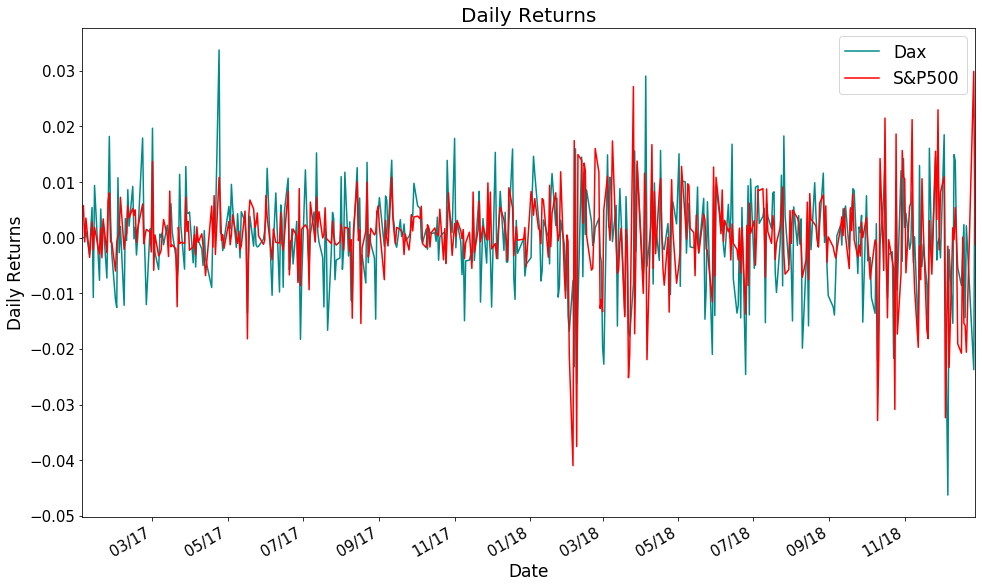

In [100]:
ax = dax_data["Daily Return"].plot(label = "Dax", figsize=(16,10), color = "darkcyan")
sp500_data["Daily Return"].plot(label = "S&P500", color = "red", ax=ax)
ax.set_title("Daily Returns", fontsize = 20)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
plt.ylabel("Daily Returns", fontsize = 17)
plt.xlabel("Date", fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={"size":17});

Nun überprüfen wir, ob die täglichen Renditen der beiden Indizes zusammenhängen, oder ob diese unabhängig voneinander sind.

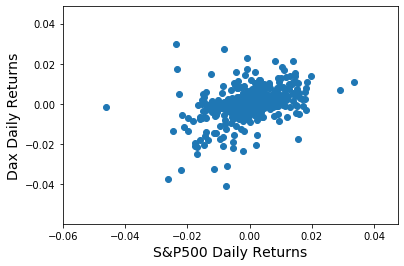

In [101]:
plt.scatter(dax_data["Daily Return"],sp500_data["Daily Return"])
plt.ylabel("Dax Daily Returns", fontsize = 14)
plt.xlabel("S&P500 Daily Returns", fontsize = 14)
plt.show()

Der Scatter-Plot lässt zwar einen Zusammenhang vermuten, jedoch scheint dieser nicht besonders ausgesprägt zu sein.
Um dies zu belegen, berechnen wir den Korrelationskoeffizienten:

In [102]:
dax_data["Daily Return"] = np.nan_to_num(dax_data["Daily Return"])
sp500_data["Daily Return"] = np.nan_to_num(sp500_data["Daily Return"])
np.corrcoef(dax_data["Daily Return"], sp500_data["Daily Return"])

array([[1.        , 0.41937509],
       [0.41937509, 1.        ]])

Wie bereits am Scatter-Plot zu erkennen ist, handelt es sich lediglich um einen geringen positiven Zusammenhang zwischen den täglichen Renditen der beiden Indizes.

Nun schauen wir uns an, wie die täglichen Renditen verteilt sind, hierzu verwenden wir ein Histogramm mit einer Dichte-Kurve:

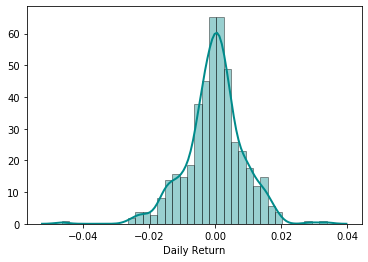

In [103]:
#dropna() notwendig, da in erste Zeile kein Wert vorhanden ist
sns.distplot(dax_data["Daily Return"].dropna(), hist = True, kde = True,
            color = "darkcyan", hist_kws = {"edgecolor":"black"}, kde_kws = {"linewidth": 2})

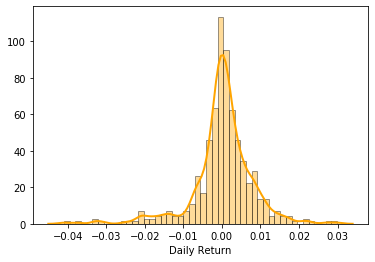

In [104]:
sns.distplot(sp500_data["Daily Return"].dropna(), hist = True, kde = True,
            color = "orange", hist_kws = {"edgecolor":"black"}, kde_kws = {"linewidth": 2})

Es lässt sich erkennen, dass die täglichen Renditen beider Indizes annährend normalverteilt sind.

##### Betrachten wir nun die Abschlusskurse der beiden Indizes

Wir überprüfen nun, ob die Abschluss-Kurse der beiden Indizes einen Zusammenhang haben:

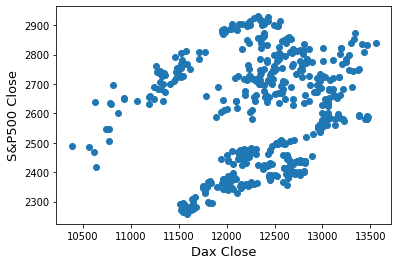

In [105]:
#Zuerst mit einem Scatter-Plot
plt.scatter(dax_data["Close"],sp500_data["Close"])
plt.ylabel("S&P500 Close", fontsize = 13)
plt.xlabel("Dax Close", fontsize = 13)
plt.show()

Der Plot lässt keinen stichhaltigen positiven (oder negativen) Zusammenhang (zumindest keinen linearen) vermuten, um dies zu belegen berechnen wir den Korrelationskoffizienten

In [106]:
np.corrcoef(dax_data["Close"], sp500_data["Close"])

array([[1.        , 0.21289732],
       [0.21289732, 1.        ]])

Wie vermutet lässt sich nur ein sehr geringer positiver Zusammenhang feststellen, demnach führen hohe, bzw. tiefe Kurse des einen Indexes nicht zwangsläufig zu hohen, bzw. tiefen Kursen des anderen Indexes

###### Nun berechnen wir die kumulativen Renditen

In [107]:
dax_data["Cumulative Return"] = (1+dax_data["Daily Return"]).cumprod()-1
sp500_data["Cumulative Return"] = (1+sp500_data["Daily Return"]).cumprod()-1

Plotten der kumulativen Renditen

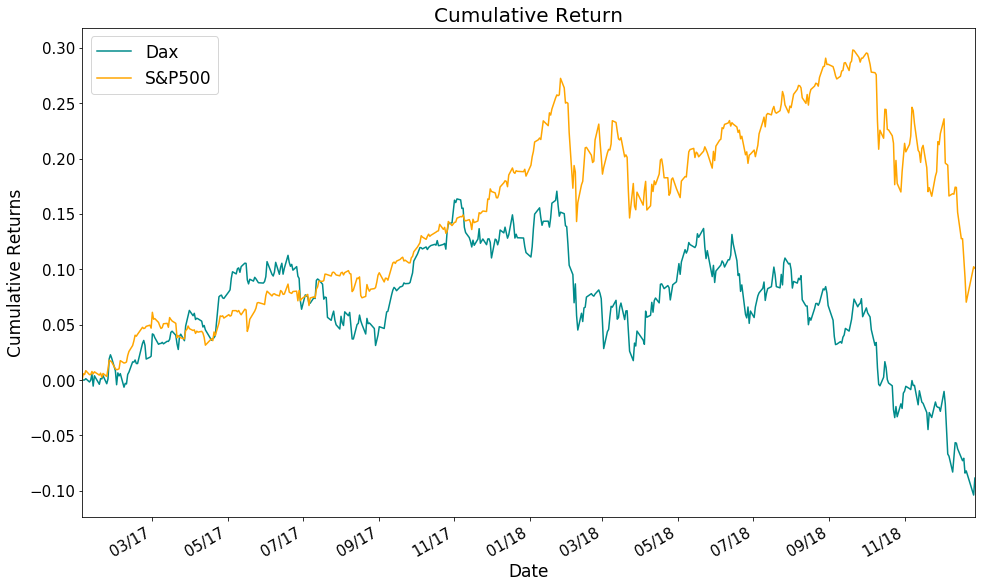

In [108]:
ax = dax_data["Cumulative Return"].plot(label = "Dax", figsize=(16,10), color = "darkcyan")
sp500_data["Cumulative Return"].plot(label = "S&P500", color = "orange", ax=ax)
ax.set_title("Cumulative Return", fontsize=20)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
plt.ylabel("Cumulative Returns", fontsize = 17)
plt.xlabel("Date", fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={"size":17});

### Berechnen der wöchentlichen Preise

In [109]:
#Date wieder als Spalte hinzufügen
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DateLocator, MONDAY
dax_data = dax_data.reset_index()
sp500_data = sp500_data.reset_index()

#Umwandeln der Werte in den Date-Spalten in Python Datetime-Objekte
dax_data["Date"] = pd.to_datetime(dax_data["Date"])
sp500_data["Date"] = pd.to_datetime(sp500_data["Date"])

#Kalenderwoche berechnen
dax_data["Week_number"] = dax_data["Date"].dt.week
sp500_data["Week_number"] = sp500_data["Date"].dt.week

#Jahr berechnen
dax_data["Year"] = dax_data["Date"].dt.year
sp500_data["Year"] = sp500_data["Date"].dt.year

dax_data.head()

,Date,Open,High,Low,Close,Volume,Total Traded,Ma20,Ma50,Daily Return,Cumulative Return,Week_number,Year
0,2017-01-03,11631.700195,11637.370117,11561.230469,11584.240234,88413500.0,1.024203e+12,NaN,NaN,0.000000,0.000000,1,2017
1,2017-01-04,11609.530273,11616.089844,11531.429688,11584.309570,82173600.0,9.519244e+11,NaN,NaN,0.000006,0.000006,1,2017
2,2017-01-05,11537.730469,11602.540039,11537.400391,11584.940430,74924900.0,8.680005e+11,NaN,NaN,0.000054,0.000060,1,2017
3,2017-01-06,11560.519531,11605.740234,11547.049805,11599.009766,67084900.0,7.781184e+11,NaN,NaN,0.001214,0.001275,1,2017
4,2017-01-09,11606.889648,11606.889648,11522.349609,11563.990234,78728200.0,9.104121e+11,NaN,NaN,-0.003019,-0.001748,2,2017


In [110]:
dax_data_weekly = dax_data.groupby(["Year", "Week_number"]).agg({"Open": "first", "High":"max", "Low":"min", "Close":"last","Volume": "sum","Total Traded":"sum", "Cumulative Return": "sum"})
sp500_data_weekly = sp500_data.groupby(["Year", "Week_number"]).agg({"Open": "first", "High":"max", "Low":"min", "Close":"last","Volume": "sum","Total Traded":"sum", "Cumulative Return": "sum"})

In [111]:
dax_data_weekly.head()

Open          High           Low         Close  \
Year Week_number                                                           
2017 1            11631.700195  11637.370117  11531.429688  11599.009766   
     2            11606.889648  11692.269531  11491.870117  11629.179688   
     3            11521.500000  11644.879883  11425.139648  11630.129883   
     4            11545.969727  11893.080078  11508.830078  11814.269531   
     5            11786.309570  11792.330078  11535.309570  11651.490234   

                       Volume  Total Traded  Cumulative Return  
Year Week_number                                                
2017 1            312596900.0  3.622247e+12           0.001341  
     2            441675600.0  5.118255e+12           0.001940  
     3            364991500.0  4.231853e+12           0.002542  
     4            438553500.0  5.145027e+12           0.059429  
     5            445010700.0  5.174468e+12           0.020281

In [112]:
dax_data_weekly["Weekly Return"] = dax_data_weekly["Close"].pct_change()
sp500_data_weekly["Weekly Return"] = sp500_data_weekly["Close"].pct_change()
dax_data_weekly.head()

Open          High           Low         Close  \
Year Week_number                                                           
2017 1            11631.700195  11637.370117  11531.429688  11599.009766   
     2            11606.889648  11692.269531  11491.870117  11629.179688   
     3            11521.500000  11644.879883  11425.139648  11630.129883   
     4            11545.969727  11893.080078  11508.830078  11814.269531   
     5            11786.309570  11792.330078  11535.309570  11651.490234   

                       Volume  Total Traded  Cumulative Return  Weekly Return  
Year Week_number                                                               
2017 1            312596900.0  3.622247e+12           0.001341            NaN  
     2            441675600.0  5.118255e+12           0.001940       0.002601  
     3            364991500.0  4.231853e+12           0.002542       0.000082  
     4            438553500.0  5.145027e+12           0.059429       0.015833  
     5            445010700.0  5.174468e+12           0.020281      -0.013778

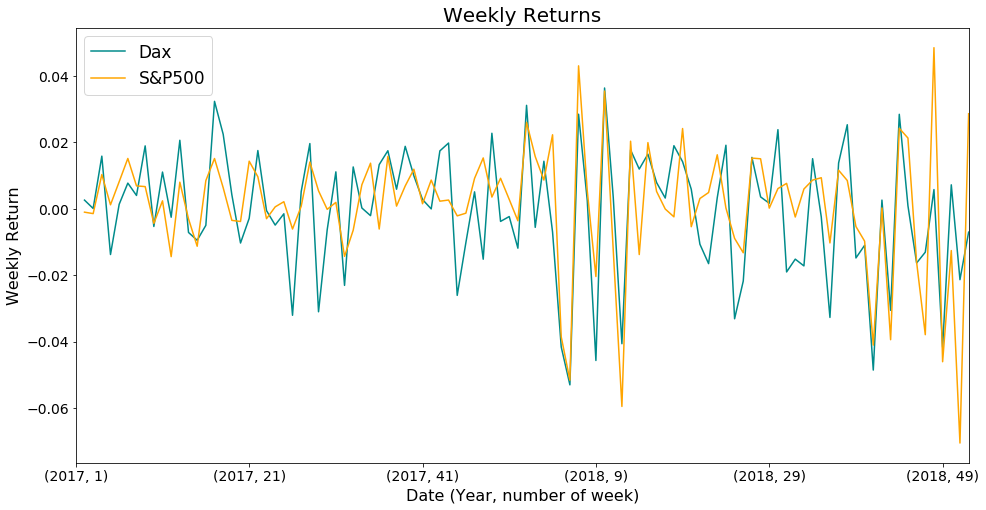

In [113]:
ax = dax_data_weekly["Weekly Return"].plot(label = "Dax",figsize=(16,8),  color = "darkcyan")
sp500_data_weekly["Weekly Return"].plot(label = "S&P500",color = "orange", ax=ax)
ax.set_title("Weekly Returns", fontsize=20)
plt.ylabel("Weekly Return", fontsize = 16)
plt.xlabel("Date (Year, number of week)", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(prop={"size": 17});

Wir versuchen einen Zusammenhang der wöchentlichen Renditen der beiden Indizes zu erkennen.
Mit einem Scatter-Plot:

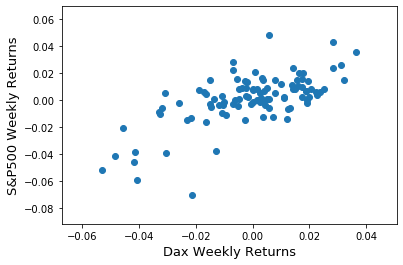

In [114]:
plt.scatter(dax_data_weekly["Weekly Return"],sp500_data_weekly["Weekly Return"])
plt.xlabel("Dax Weekly Returns", fontsize = 13)
plt.ylabel("S&P500 Weekly Returns", fontsize = 13)
plt.show()

Es lässt sich ein starker positiver linear Zusammenhang vermuten, um dies zu belegen berechnen wir den Korrelationskoeffizienten:

In [115]:
dax_data_weekly["Weekly Return"] = np.nan_to_num(dax_data_weekly["Weekly Return"])
sp500_data_weekly["Weekly Return"] = np.nan_to_num(sp500_data_weekly["Weekly Return"])
np.corrcoef(dax_data_weekly["Weekly Return"], sp500_data_weekly["Weekly Return"])

array([[1.        , 0.66634172],
       [0.66634172, 1.        ]])

Wie bereits vermutet ist ein hoher positiver Zusammenhang vorhanden, was bedeutet, dass hohe/niedrige Wochenrenditen des Dax in aller Regel auch mit hohen/niedrigen Wochenrenditen des S&P500 einhergehen und umgekehrt.